## Conjugate gradient and steepest descent example

We implement both algoritm and apply them to a simple example. 

In [1]:
using Plots
using LinearAlgebra

We first define the matrix, $A$ and the source vector, $b$ for the problem we want to solve: find $x$ such that $A*x = b$.
We also compute the exact inverse using LinearAlgebra. Notice that for this simple case we can find the exact solution if we express the matrix as rational.

In [11]:
A = [[1, 1//2] [1//2, 4]] #[[1, 0.5] [0.5, 400]]
A_inv = inv(A)

2×2 Matrix{Rational{Int64}}:
 16//15  -2//15
 -2//15   4//15

In [12]:
b = [1,1]

2-element Vector{Int64}:
 1
 1

For reference we compute the exact solution.

In [13]:
xf = A_inv*b

2-element Vector{Rational{Int64}}:
 14//15
  2//15

Next we give some starting point. Here it is chosen for grafical purposes.

In [15]:
x0 = [-2,0.1] #[-3,0.1]

2-element Vector{Float64}:
 -2.0
  0.1

### Steepest descent

We set the number of iterations and create the vector to save it.

In [16]:
N=40
xr = zeros(N,2)
xr[1,:] = x0

2-element Vector{Float64}:
 -2.0
  0.1

In [17]:
for i in 1:(N-1)
    r = A*xr[i,:] - b
    l = r'*r / (r'*A *r)
    xr[i+1,:] = xr[i,:] - l*r
    println(r'*r / (b'*b))
end
for i in 1:(N-1)
    println(xr[i,:] - xf)
end


5.6312500000000005
2.986187830582353
0.8317337353727644
0.4410589405291812
0.12284679361724864
0.06514425751403145
0.018144430194688806
0.009621784974957711
0.002679926251194469
0.0014211344121065714
0.0003958242080229976
0.00020990107579101842
5.8463102701874355e-5
3.100231845974301e-5
8.634980651136476e-6
4.579032033338521e-6
1.2753837446112484e-6
6.763214947801161e-7
1.8837375111012623e-7
9.989245783199668e-8
2.7822739828136698e-8
1.475408250178296e-8
4.109409336388321e-9
2.179173034616382e-9
6.069583800277536e-10
3.2186312597085307e-10
8.964754905872427e-11
4.753907570077087e-11
1.3240912913444522e-11
7.021505529189279e-12
1.9556783940852542e-12
1.0370740105428362e-12
2.888530425633252e-13
1.531754833536379e-13
4.2663497481444025e-14
2.2623967495532246e-14
6.301384253871608e-15
3.341552410891981e-15
9.307123432199384e-16


[-2.9333333333333336, -0.033333333333333326]
[-1.5292393026941362, 0.7282091917591126]
[-1.1273302786359676, -0.01281057134813604]
[-0.5877128758661092, 0.2798632742219568]
[-0.43325234902140286, -0.004923322147970505]
[-0.22586813185502963, 0.10755625326429977]
[-0.16650630386658605, -0.0018921170893930472]
[-0.08680499455197133, 0.04133571169141492]
[-0.06399122656791933, -0.0007271730291808776]
[-0.03336064728247756, 0.015886022515465503]
[-0.024592925208091976, -0.0002794650591828596]
[-0.012821068566965299, 0.00610527074617398]
[-0.009451482691129054, -0.00010740321239918749]
[-0.004927356409093586, 0.0023463601948064683]
[-0.0036323668008113597, -4.1276895463793206e-5]
[-0.0018936675250916801, 0.0009017464405198239]
[-0.0013959808219319303, -1.5863418431044662e-5]
[-0.000727768888195035, 0.00034655661342622435]
[-0.0005364993575995847, -6.096583609088713e-6]
[-0.0002796940580153118, 0.00013318764667394345]
[-0.00020618589896281847, -2.343021579143123e-6]
[-0.00010749122057562843,

## Conjugate gradient 

We proceed as before, fix the iteration number and a vector where to store it.

In [8]:
NN=5
xs = zeros(NN,2)
xs[1,:]=xr[1,:]
r = A*xs[1,:] - b
s = -r
for i in 1:(NN-1)
    rp=r
    l = r'*r / (s'*A *s)
    xs[i+1,:] = xs[i,:] + l*s
    r = r + l*A*s
    s = -r + r'*r / (rp'*rp) * s
    println(r'*r/(b'*b))
end
xs[:,:]

2.9861878305823533
1.232595164407831e-31
6.914141850210132e-33
1.8628404803631573e-61


5×2 Matrix{Float64}:
 -2.0       0.1
 -0.595906  0.861543
  0.933333  0.133333
  0.933333  0.133333
  0.933333  0.133333

Next we define the function $F(x) = \left<x,(Ax - b) \right>

In [18]:
function F(A,b,x,y)
    return @. 0.5*(A[1,1]*x*x + 2*A[1,2]*x*y + A[2,2]*y*y) - b[1]*x - b[2]*y
end

F (generic function with 2 methods)

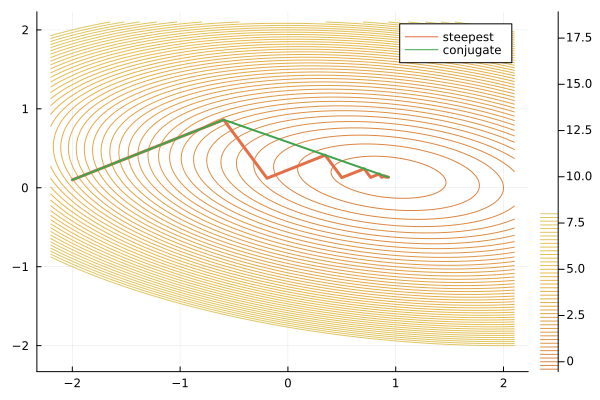

In [19]:
gr()
x = -2.2:0.01:2.10 #this is rho 
y = -2.2:0.01:2.10 #-0.2:0.01:0.2
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = F(A,b,X,Y)
#levels = 50
levels = -2.:0.2:8.
#levels = [0.,-0.01,-0.02]
p1 = contour(x, y, Z, fill = false, levels = levels, c = cgrad(:beach))
#p1 = contour(x, y, h, fill = true, levels = 10, c = cgrad([:orange, :blue], [-0.1, -0.3, -1.]))
#scatter!(s[:,1],s[:,2])
plot!(xr[:,1],xr[:,2],lw = 3, label="steepest")
plot!(xs[:,1],xs[:,2],lw = 2, label="conjugate")
#plot(F(A,x_val,y_val))
#savefig("steep_descend.pdf")
#savefig("cg.pdf")
#pdf(steep)